In [1]:
from datasets import load_dataset
# import re
from collections import defaultdict
ds = load_dataset("clarin-knext/fiqa-pl", "corpus")
from collections import OrderedDict
from matplotlib import pyplot as plt
import regex

In [2]:
print(ds.shape)
print(type(ds))
print(ds.keys())

{'corpus': (57638, 3)}
<class 'datasets.dataset_dict.DatasetDict'>
dict_keys(['corpus'])


In [3]:
time_pattern = r'\b([01]?[0-9]|2[0-3]):[0-5][0-9]\b'

In [4]:
hours = defaultdict(int)
for text in ds['corpus']['text'][:]:
    match = regex.search(time_pattern, text)
    
    if match:
        matched_hour = match.group().split(":")[0].lstrip("0") or "0" # handling 00:xx case
        hours[matched_hour] += 1

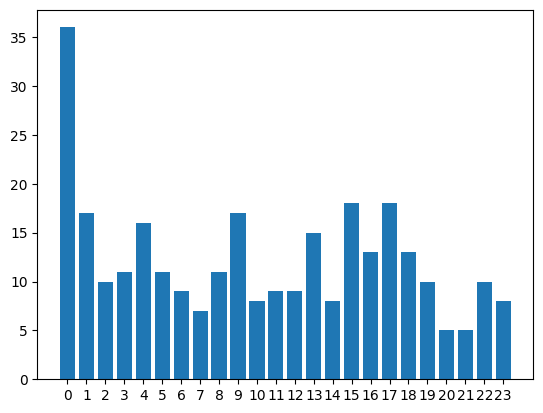

In [5]:
sorted_hours = OrderedDict(sorted(hours.items(), key=lambda item: int(item[0])))
keys = list(sorted_hours.keys())
values = list(sorted_hours.values())
plt.bar(keys, values)
plt.show()

In [26]:
date_pattern_classic =  r"(([0-2][0-9]|3[01])[./](0[1-9]|1[0-2])[./](\d{4}|\d{2}))" # DD.MM.YYYY | DD.MM.YY | DD/MM/YYYY | DD/MM/YY

date_pattern_names = r'(([0-2]?[0-9]|3[01]) (stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia))' ## DD [month's name]
date_pattern = f"({date_pattern_classic}) | ({date_pattern_names})" 

months_in_nominative = {
    "stycznia": "styczeń",
    "lutego": "luty",
    "marca": "marzec",
    "kwietnia": "kwiecień",
    "maja": "maj",
    "czerwca": "czerwiec",
    "lipca": "lipiec",
    "sierpnia": "sierpień",
    "września": "wrzesień",
    "października": "październik",
    "listopada": "listopad",
    "grudnia": "grudzień"
}

numbers_to_months = {
    "1": "styczeń",
    "2": "luty",
    "3": "marzec",
    "4": "kwiecień",
    "5": "maj",
    "6": "czerwiec",
    "7": "lipiec",
    "8": "sierpień",
    "9": "wrzesień",
    "10": "październik",
    "11": "listopad",
    "12": "grudzień"
}

In [22]:
months = defaultdict(int)
for text in ds['corpus']['text'][:]:
    match = regex.search(date_pattern, text)

    if match:
        date_str = match.group(0).strip(" ")
        if regex.search(r"\p{L}", date_str):
            month = date_str.split(" ")[1]
            months[months_in_nominative[month]] += 1
        else: 
            separator = "." if "." in date_str else "/"
            month = date_str.split(separator)[1].lstrip("0")
            month_name = numbers_to_months[month]
            months[month_name] += 1

In [24]:
months

defaultdict(int,
            {'czerwiec': 56,
             'kwiecień': 114,
             'grudzień': 87,
             'maj': 35,
             'wrzesień': 80,
             'sierpień': 54,
             'styczeń': 119,
             'listopad': 27,
             'październik': 72,
             'lipiec': 61,
             'marzec': 44,
             'luty': 31})

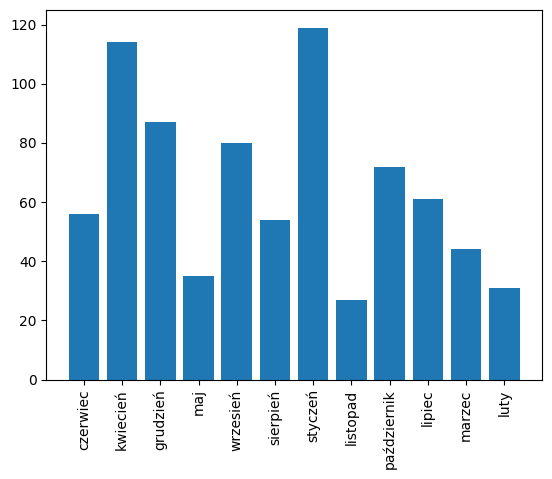

In [25]:
plt.bar(list(months.keys()), list(months.values()))
plt.xticks(rotation=90)
plt.show()

In [10]:
april_pattern = r"\bkwie(cień|tni(a|owi|em|u))\b"
april_preceded = r"(?<=\d+\s)kwie(cień|tni(a|owi|em|u))\b"
april_not_preceded = r"(?<!\d+\s)kwie(cień|tni(a|owi|em|u))"

In [19]:
def count_matches(pattern):
    counter = 0
    for text in ds['corpus']['text'][:]:
        match = regex.search(pattern, text.lower())
        if match:
            counter += 1
            # print(match.group(0))
    return counter

In [20]:
print("Aprils: ", count_matches(april_pattern))
print("Aprils preceded: ", count_matches(april_preceded))
print("Aprils not preceded: ", count_matches(april_not_preceded))

Aprils:  257
Aprils preceded:  139
Aprils not preceded:  129


Okazuje się, że sie nie sumują. Dlaczego?

Poniżej rozwiązanie GPT:

In [13]:
time_pattern = r'\b\d{1,2}:\d{2}\b' # zwraca np. godzinę 80
date_pattern = r'\b\d{1,2}\s+[a-zA-Ząćęłńóśźż]+\b'
kwiecien_pattern = r'\bkwie\w*\b'
kwiecien_with_number_pattern = r'(?<=\d+\s)kwie\w*'
kwiecien_without_number_pattern = r'(?<!\d+\s)kwie\w*'

Zapewne gdyby się troche z LLM pobawić to by sensowniejsze patterny podał, te są zbyt ogólne. Ale gdy wkleiłem całą treść zadania naraz to takie zaproponował


1. Are regular expressions good at capturing times?

Regular expressions can be very useful for capturing time formats since there are relatively few standard time formats. However, it's important to be cautious when using them. While regex can help extract useful information, the results may not be accurate. For instance, we risk matching "22:25" which could refer to a voleyball score instead of time. Therefore, it's crucial to be mindful of context and potential ambiguity

2. Are regular expressions good at capturing dates?
 
In this case, using regular expressions becomes even more challenging. The number of potential cases increases, especially in languages like Polish, where there are many inflectional forms of month names that need to be covered. This makes it harder to cover all possible variations. However, since I’m not aware of any better methods for capturing dates at this moment, we can still consider regular expressions to be quite good.


3. How one can be sure that the expression has matched all and only the correct expressions of a given type?


We should aim to define the pattern as precisely as possible, because a pattern that is too general will match unintended cases. It's also helpful to write tests that cover edge cases. However, there is still a chance that we might overlook something, so careful review and testing are important.

4. Is LLM able to generate regular expressions?


Yes, it generally works quite well, as long as we provide enough context. LLMs tend to create patterns that are too general, but with our feedback, they can adjust them accordingly.
